# Ligh waves part 2
## The Jamin interferometer
In this experiment, you will buid the Jamin interferometer as illustrated in the following figure. **The primary goal is to examine the relationship between the refractive index of a gas and pressure.** In particular, you will measure the polarizability $\alpha$ for air, helium and CO2.

The first prism splits the incoming beam into two beams of approximately equal intensity. One beam will pass through air while the other will pass through a vacuum tube, allowing you to control the pressure with a vacuum pump. The second prism reflects the two beams onto a CCD camera. When the setup is properly aligned, an interference pattern will be visible between the two beams. An example of the interference pattern between the two beams as seen on the CCD camera is provided in the image below.

## Tips for aligning the optical setup

* **Ensure your telescope is collimated**: This means that the two lenses placed after the laser maintain the same beam shape for the relevant distances in your experiment. If not, adjust the distance between the two lenses until the beam retains the same size for distances up to 1.5m.

* **Start alignment without the vacuum tube**: First position the prisms and the camera. Make sure that both beams coincide on the camera on the same position. After you confirm that, introduce the vacuum tube.

* **Beam quality is crucial for observing the interference pattern**: If the beam shape is distorted or contains artifacts, it will be difficult to observe the interference. Take care to ensure that the beam shape is not compromised by any optical element and that it is not cropped at any point on its path. If any optical element has minor imperfections such as scratches or dirt, try to avoid directing the beam onto these imperfections.





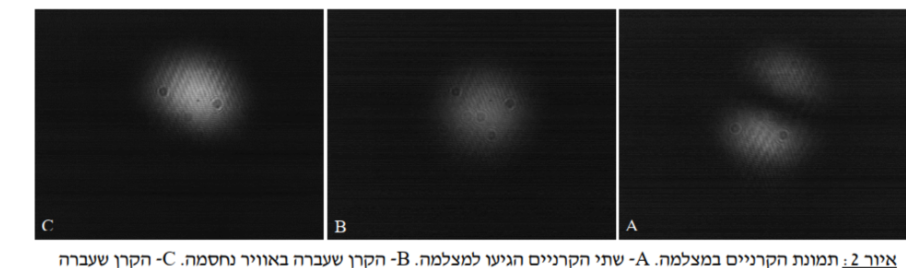

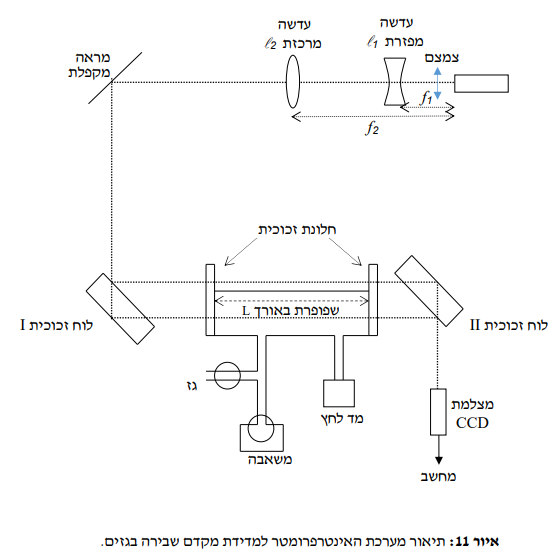

## Theoretical background
The phase difference between the beam which travels in free space and the beam that goes through the vacuum chamber  is

$$
\begin{equation}\Delta \phi=2\pi\left(\frac{L}{\lambda\left(p_{\text{atmospheric}}\right)}-\frac{L}{\lambda \left(p\right)}\right)
\end{equation}
$$

Where $L$ is the length of the vacuum tube. Note that this is not the distance between the prisms, this parameter is meaningless. The destructive interference fringe is going to appear when the phase difference is uneven multiplication of pi:

$$
\begin{equation}\Delta \phi_{\text{fringe}}=\pi \left(2m+1\right),m=0,1,2,3… \end{equation}
$$

When we change the pressure from $p1$ to $p2$ the number of times the interference pattern will cross the screen is


\begin{equation}N_{\text{fringes}}=\frac{\Delta \phi_{p1,p2}}{2\pi}=L\left(\frac{1}{\lambda\left(p1\right)}-\frac{1}{\lambda\left(p2\right)}\right)\end{equation}

By using the relation between the diffraction index and the wavelength we get

$$ N_{\text{fringes}}=\frac{L}{\lambda_a}\left(n\left(p_1\right)-n\left( p2\right)\right)
$$

If we set $p_2$ to be the atmospheric pressure we get

\begin{equation} N_{\text{fringes}}=\frac{L}{\lambda_a}\left(n\left(p_1\right)-1\right) \end{equation}

For dilute gases in which the density is quite small we can make the following approximation for the refraction index:

\begin{equation} n\approx1+\frac{1}{2}\alpha\rho \end{equation}

where $\alpha$  the polarizability of the particles and $\rho $ is the density of particles. From the equation of state for ideal gas we get

\begin{equation} \rho=\frac{P}{k_{B}T} \end{equation}

Therefore the refraction index can be expressed as

\begin{equation} n\approx1+\frac{1}{2}\alpha\frac{P}{k_{B}T} \end{equation}

Using the relation between the number of fringes to the refraction index we deduce that the number of fringes as a function of pressure can be expressed as

\begin{equation} N_{\text{fringes}}=\frac{L}{\lambda_a}\left(\frac{1}{2}\alpha\frac{P}{k_{B}T} \right) \end{equation}




In [16]:
from scipy.constants import Boltzmann, mmHg, zero_Celsius # Some constants we are going to use
import numpy as np 				# math functions
import matplotlib.pyplot as plt 			# for plotting figures and setting their properties
from scipy.stats import linregress 		# contains linregress (for linear regression)


Now, calculate the polarizability $\alpha$

In [23]:
arr_gases = ("helium", "air", "CO2", "MIX")
p_arr_mmHg = np.array([312-18 ,502-271, 179-14 ,260-14]) #pressure in mm Hg
p_arr_mmHg_err = np.array([2 ,2, 2 ,2]) #this is the estimated error in the pressure

N_arr = np.array([7 ,37 , 38 ,39])
p_arr_mmHg_air = np.array([16, 71,132,198,254,312,379,432,500,557,620,686,744]) #pressure in mm Hg
N_arr_air = np.array([i*10 for i in range(13)])

p_arr_mmHg_air *= mmHg
p_arr_Pa = p_arr_mmHg*mmHg # translate to units of pascal

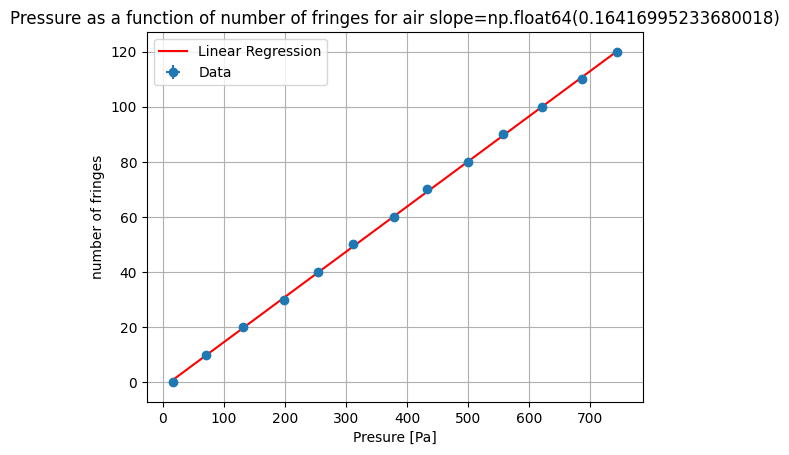

In [28]:
# system parameters
L = .2; # measure the interferometer and adjust this number!
lambda_laser = 532e-9;
T = 25 + zero_Celsius; # measure the temperature in this room and adjust the number!

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(p_arr_mmHg_air,N_arr_air)



plt.figure;
plt.errorbar(p_arr_mmHg_air,N_arr_air, xerr=5, yerr=1, fmt='o', label='Data') # make sure you adjust the errorbars based on your data!!!12
plt.plot(p_arr_mmHg_air, slope * p_arr_mmHg_air + intercept, color='red', label='Linear Regression')

plt.xlabel("Presure [Pa]")
plt.ylabel("number of fringes")
plt.title(label=f"Pressure as a function of number of fringes for air {slope=}")
plt.legend()
plt.grid()
plt.show()


Now, calculate the polarizability coefficient from the linear fit:

In [29]:
alpha = slope*2*lambda_laser*Boltzmann*T/L
# Print results
print("The slope of the regression is {:.2f}".format(slope))
print("The scalculated polarizability is {:.3e} m^3".format(alpha))

# remember to also calculate the refraction index and include this in your report!

The slope of the regression is 0.16
The scalculated polarizability is 3.595e-27 m^3


Repeat the same process for Helium snd CO2.